# Análise exploratória de dados

In [4]:
pip list | grep matplotlib

matplotlib                 3.8.4
matplotlib-inline          0.1.7
Note: you may need to restart the kernel to use updated packages.


In [71]:
from IPython.display import display, Markdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


colors = ["#9467bd", "#057476", "#FF7A00"]
# sns.set_style("whitegrid")
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(colors))

In [72]:
df = pd.read_csv('../data/raw/data.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## 1. Descrição dos dados

## 1. Descrição dos dados

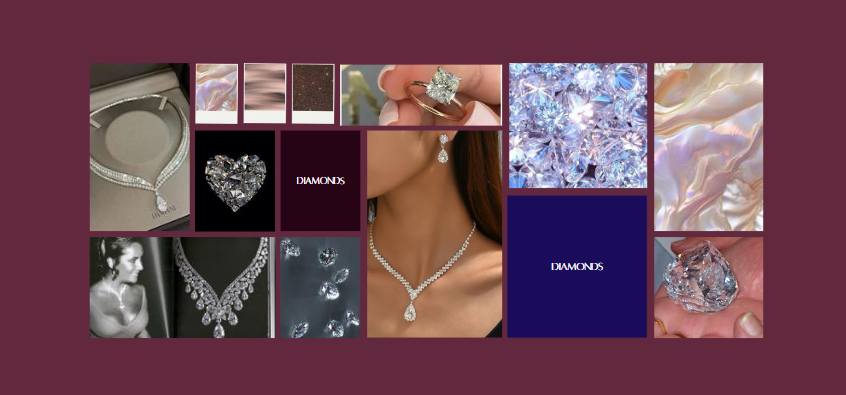

**Prices of over 50,000 round cut diamonds** é um conjunto de dados com informações sobre  diamantes já lapidados. Este dataset conta com informações como preço e outros atributos de quase cinquenta e quatro mil diamantes.

### 2.1. Dicionário de dados

In [73]:
dicionario = pd.read_csv('../data/external/dictionary.csv')
dicionario.head()

,variavel,descrição,tipo,subtipo
0,price,preço em USD,quantitativa,contínua
1,carat,peso do diamante,quantitativa,contínua
2,cut,qualidade do corte,qualitativa,ordinal
3,color,cor do diamante,qualitativa,ordinal
4,clarity,uma medida de quão claro é o diamante,qualitativa,ordinal


* São dez variáveis, sendo sete delas quantitativas contínuas e três qualitativas ordinais.

## 2. Perguntas de partida e hipóteses

* Há dados faltantes neste conjunto de dados?
* Existe relação entre o preço e a cor do diamante?
* Existe relação entre a cor e a clareza do diamante?
* Diamantes maiores tendem a ser necessariamente os mais valiosos?
* O tamanho da mesa do diamante pode influenciar na qualidade do corte?


In [74]:
# colunas (variáveis) contendo valores valtantes
numero_na_coluna = df.isnull().sum().loc[lambda x: x > 0]
numero_na_linha = df.isnull().any(axis=1).sum()

display(numero_na_coluna)
display(Markdown(
    "---\n"
    f"A partir dessa informação sabemos que não temos dados faltantes"
    "\n\n ---"
))

df.dropna(inplace=True)

Series([], dtype: int64)

---
A partir dessa informação sabemos que não temos dados faltantes

 ---

### Qual a distribuição dos dados (variável por variável)?

In [75]:
df.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


Distribuição das variáveis qualitativas

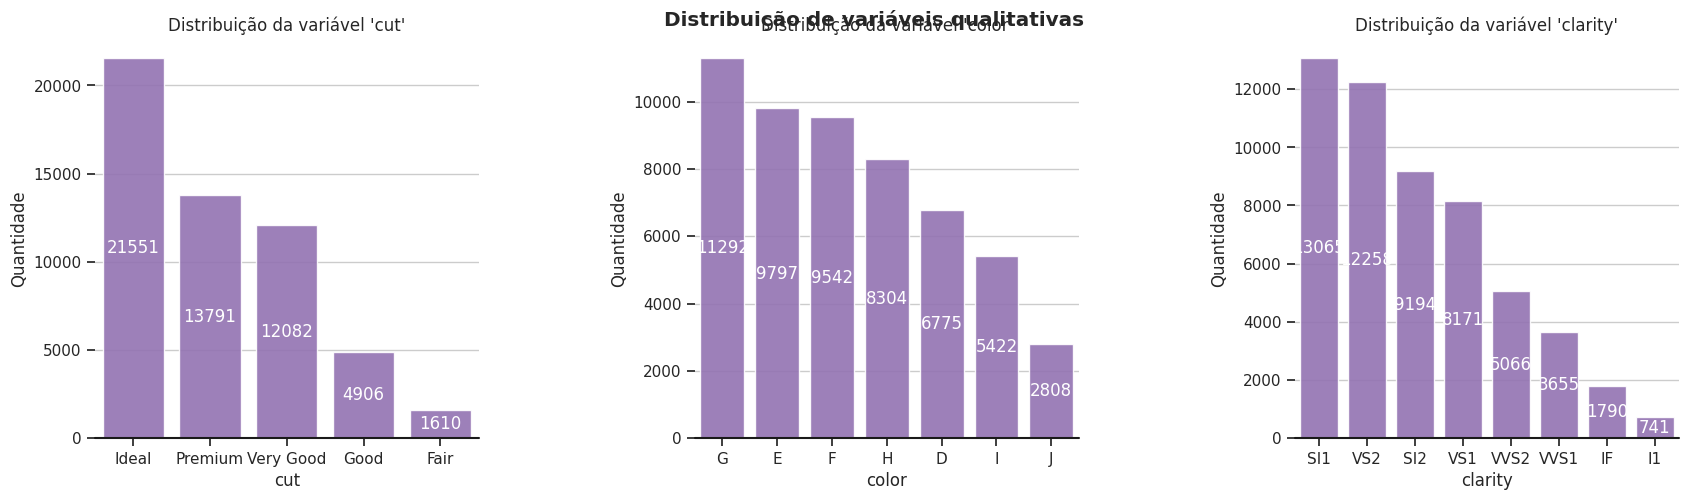

In [76]:
fig, axes = plt.subplots(1, 3, figsize=(17,5))
plt.tight_layout(pad=2, w_pad=10, h_pad=5)
fig.suptitle('Distribuição de variáveis qualitativas', fontweight='bold')
for i, variavel in enumerate(dicionario.query("tipo == 'qualitativa'").variavel.to_list()):
    order = df[variavel].value_counts().index
    ax = sns.countplot(
        data=df,
        x=variavel,
        ax=axes.flatten()[i],
        color=colors[0],
        alpha=0.9,
        order=order
    )
    ax.bar_label(
        ax.containers[0],
        fmt='%.0f',
        label_type='center',
        color='white'
    )
    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')
plt.show()

* Os diamantes com a pior com e clareza são mais raros que os de melhor 


 ---

### Distribuição das variáveis quantitativas

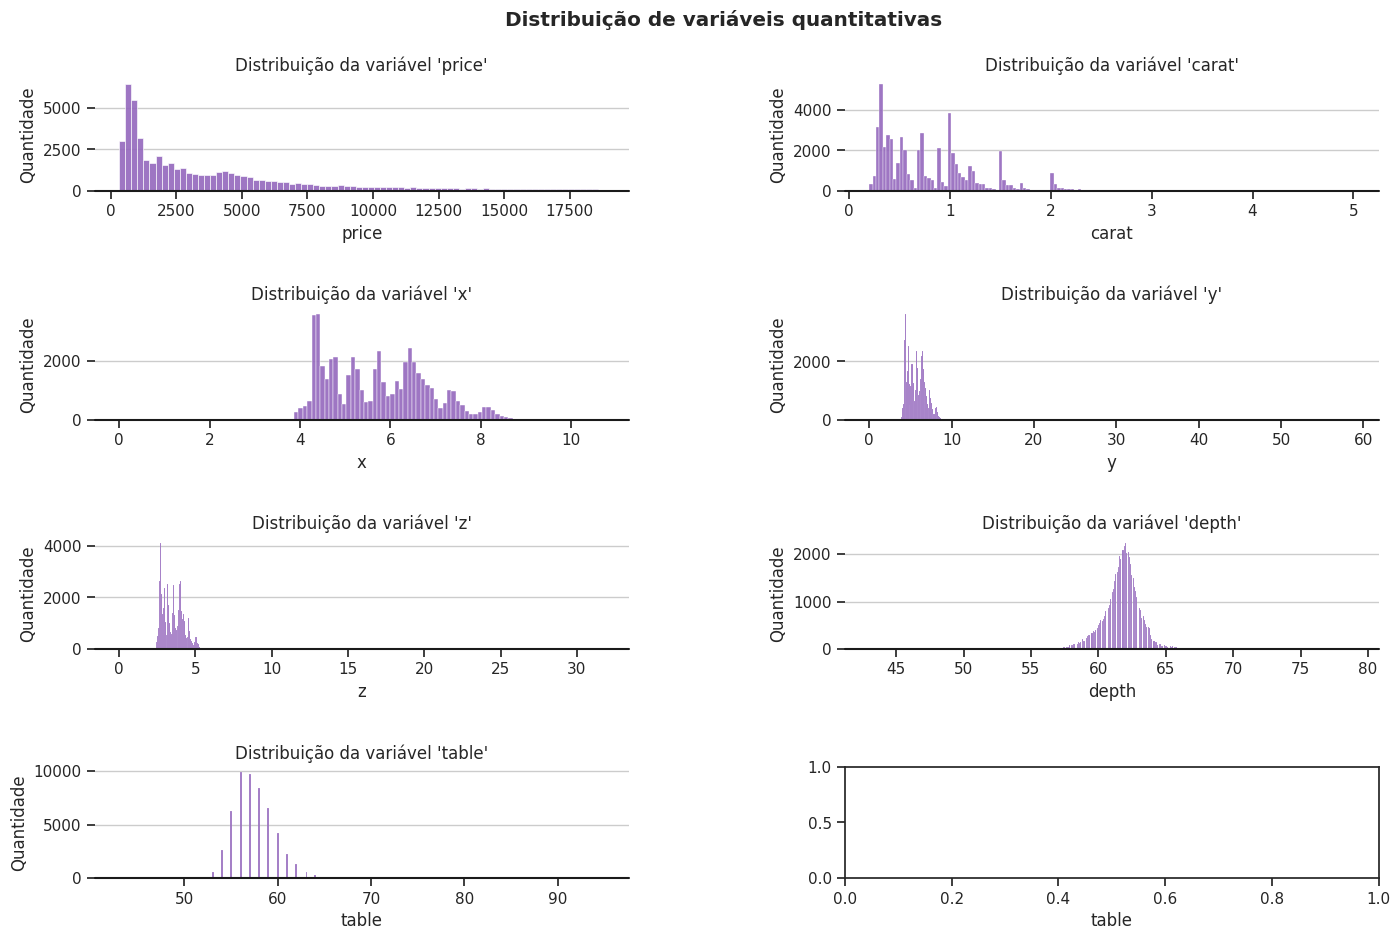

In [70]:
fig, axes = plt.subplots(4, 2, figsize=(15,10))
plt.tight_layout(pad=5, w_pad=10, h_pad=5)
fig.suptitle('Distribuição de variáveis quantitativas', fontweight='bold')
for i, variavel in enumerate(dicionario.query("tipo == 'quantitativa'").variavel.to_list()):
    ax = sns.histplot(
        data=df,
        x=variavel,
        ax=axes.flatten()[i],
        color=colors[0],
        alpha=0.9,
    )
    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    plt.xlabel(variavel)
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')
    # Customize grid to show only vertical lines
plt.show()


* Diamantes baratos são muito mais comuns.
* Há três principais modas de quilate de diamante 

/tmp/ipykernel_70420/449712270.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


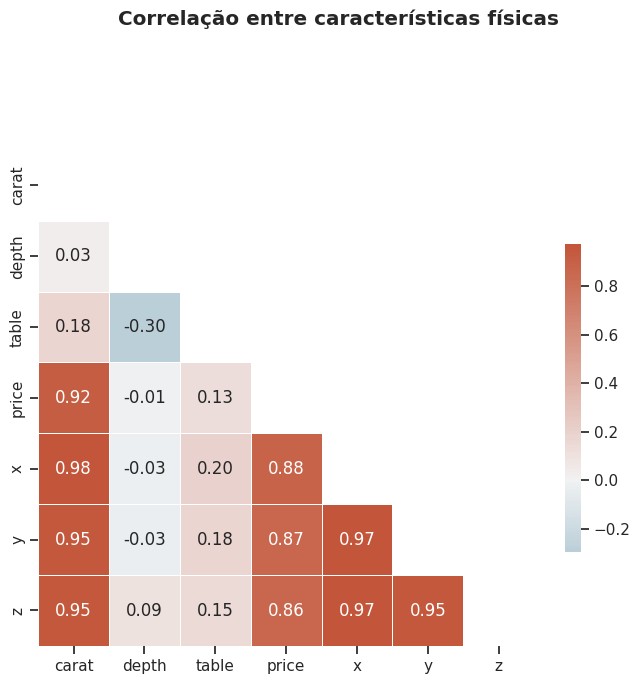

In [57]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.figure(figsize=(8,8))
# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},
    annot=True, 
    fmt=".2f"
)
ax.grid(False)

plt.suptitle(f"Correlação entre características físicas", fontweight='bold')
plt.show()


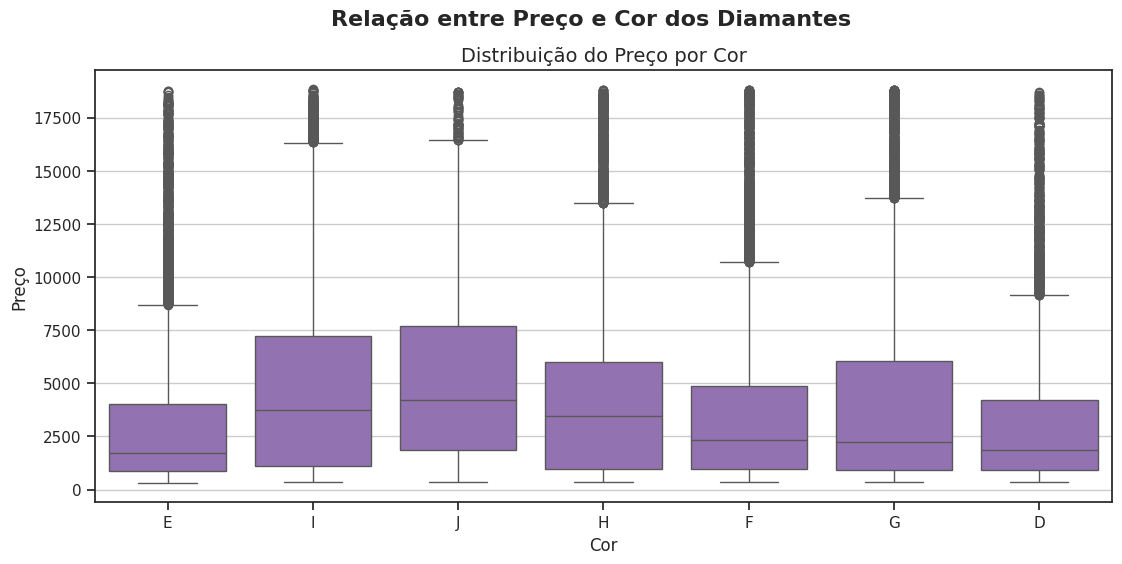

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que você tenha essas colunas em df: 'price' e 'color'
fig, axes = plt.subplots(1, 1, figsize=(12, 6))  # Ajustado para um único gráfico
plt.tight_layout(pad=4, w_pad=2, h_pad=5)
fig.suptitle('Relação entre Preço e Cor dos Diamantes', fontweight='bold', fontsize=16)

# Criando o boxplot
ax = sns.boxplot(
    x="color",  # Cor dos diamantes
    y="price",  # Preço dos diamantes
    color=colors[0],
    data=df,
    ax=axes,
   # palette="Set2"
    
)

# Adiciona a grade
ax.grid(axis='y', linestyle='-')

# Ajusta o título e os rótulos dos eixos
ax.set_title('Distribuição do Preço por Cor', fontsize=14)
ax.set_xlabel('Cor', fontsize=12)
ax.set_ylabel('Preço', fontsize=12)

# Remove a legenda, se não for necessária
# handles, labels = plt.gca().get_legend_handles_labels()
# ax.legend([], [], frameon=False)

plt.show()


## 3. Insights